### 4.2  损失函数

    神经网络以某个指标为线索寻找最优权重参数。神经网络的学习中所用的指标称为损失函数（loss function）。
    
    这个损失函数可以使用任意函数，但一般用均方误差和交叉熵误差等。

4.2.1 均方误差
    
    均方误差会计算神经网络的输出和正确解监督数据的各个元素之差的平方，再求总和。
    y 表示神经网络的输出，t 表示监督数据，k表示数据维数。
    其中t 是监督数据，将正确解标签设为1，其他均设为0，该表示方法称为one-hot表示。

$E = \frac{1}{2} \sum_{k} (y_k - t_k)^2$

In [3]:
import numpy as np

In [4]:
# 均方误差
def mean_squared_error(y, t):
    return 0.5*np.sum((y-t)**2)

In [7]:
# 设“2”为正确解
t = [0,0,1,0,0,0,0,0,0,0]

# 例1：“2”的概率最高的情况（0.6）
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]

mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [8]:
# 例2：“7”的概率最高的情况（0.6）
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
mean_squared_error(np.array(y), np.array(t))

0.5975

4.2.2  交叉熵误差
    
    交叉熵误差实际上只计算对应正确解标签的输出的自然对数。也就是说，交叉熵误差的值是由正确解标签所对应的输出结果所决定。
    正确解标签对应的输出越大，交叉熵的值越接近0；正确解标签对应的输出越小，交叉熵的值越大。

$E = -\sum_{k} t_klogy_k$

In [16]:
# 交叉熵误差
def cross_entropy_error(y, t):
    delta = 1e-7 # 作为保护性对策，添加一个微小值delta可以防止负无限大的发生
    return -np.sum(t * np.log(y + delta))

In [17]:
# 设“2”为正确解
t = [0,0,1,0,0,0,0,0,0,0]

# 例1：“2”的概率最高的情况（0.6）
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [19]:
# 例2：“7”的概率最高的情况（0.6）
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

4.2.3  mini-batch 学习
    
    针对训练数据计算损失函数的值，找出使该值尽可能小的参数。也就是说，如果训练数据有100个的话，我们就要把这100个损失函数的总和作为学习的指标。
    如果要求所有训练数据的损失函数的总和，以交叉熵误差为例。

$ E = -\frac{1}{N} \sum_{n} \sum_{k} t_{nk}logy_{nk} $

上式只是把求单个数据的交叉熵误差损失函数的式子扩大到了N份数据，不过最后还要除以N进行正规化。

我们将从全部数据中选出一部分，作为全部数据的近似。

神经网络的学习也是从训练数据中选出一批数据（称为mini-batch，小批量），然后对每个mini-batch进行学习。

In [27]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train),(x_test, t_test) = load_mnist(normalize = True, one_hot_label = True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


读入上面MNIST数据后，训练数据有60000个，输入数据是784维（28x28）的数据数据，监督数据是10维的数据。

In [28]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [29]:
np.random.choice(60000, 10)

array([51871, 44407, 19844,  7131, 55094, 36652, 25610, 12223, 53596,
       55393])

用随机选择的小批量数据（mini-batch）作为全体训练数据的近似值。

4.2.4  mini-batch版交叉熵误差的实现

    

当监督数据 t 为one-hot表示时可以通过如下代码实现：

In [31]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

当监督数据 t 是标签形式（非one-hot表示，而是想“2”“7”这样的标签）时，交叉熵误差可通过如下代码实现：

In [32]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch.size), t] + 1e-7)) / batch_size

4.2.5  为何要设定损失函数

在神经网络的学习中，寻找最优参数（权重和偏置）时，要寻找使损失函数的值尽可能小的参数。

为了找到使损失函数的值尽可能小的地方，需要计算参数的导数（确切地说是梯度），然后以这个导数为指引，逐步更新参数的值。

在进行神经网络的学习时，不能将识别精度作为指标。因为如果以识别精度为指标，则参数的导数在绝大多数地方都会变成 0 

sigmoid函数的导数在任何地方都不为 0

#### 4.3  数值微分

    利用微小的差分求导数的过程称为数值微分。

4.3.1  导数

    导数的含义是，x 的“微小变化”将导致函数f(x)的值在多大程度上发生变化，其中，表示微小变化的h无限趋近 0 

In [34]:
# 不好的实现示例
def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h) - f(x)) / h

改进1：

    h使用了10e-50的微小值，会产生舍入误差，即指因省略小数的精细部分的数值（比如小数点后第8位以后的数值）而造成最终的计算结果上的误差。
    可将微小值h改为 1e-4 # 0.0001

改进2：

    函数f的差分计算一开始就有误差。这个差异的出现时因为h不可能无限接近0。 
    我们可以计算函数f在(x + h)和(x - h)之间的差分。因为这种计算方法以 x 为中心，计算它左右两边的差分，所以称为中心差分（而(x + h)和 x 之间的差分称为前向差分）

In [35]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

4.3.2  数值微分的例子

$ y = 0.01x^2+0.1x $

In [36]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

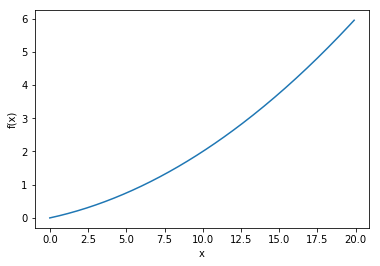

In [38]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1) # 以0.1为单位，从0到20的数组x
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

计算该函数在x=5和x=10处的导数

In [39]:
numerical_diff(function_1, 5)

0.1999999999990898

In [40]:
numerical_diff(function_1, 10)

0.2999999999986347

在x=5和x=10处，严格意义上“真正的导数”分别为0.2和0.3 。与上述相比，误差小到基本上可以认为它们是相等的。

用上面的数值微分的值作为斜率，画一条直线

0.1999999999990898


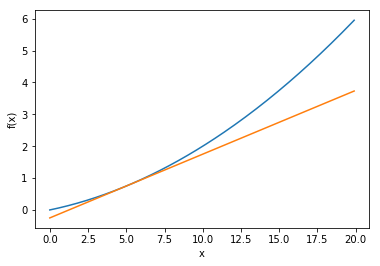

In [49]:
def tangent_line(f, x):
    d = numerical_diff(f,x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x,y)
plt.plot(x,y2)
plt.show()

4.3.3  偏导数

$ f(x_0, x_1) = x_0^2+x_1^2 $

In [50]:
def function_2(x):
    return x[0]**2 + x[1]**2
    # 或者 return np.sum(x**2)

In [54]:
# x0=3,x1=4时，求x0的偏导数
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [53]:
# x0=3,x1=4时，求x1的偏导数
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

#### 4.4 梯度

现在考虑一起计算x0与x1的偏导数。
像$ (\frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1}) $ 这样的由全部变量的偏导数汇总而成的向量称为 梯度 。

In [59]:
def numerical_gradient(f,x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # 生成和 x 形状相同、所有元素都为 0 的数组
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h)的计算
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h)的计算
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 还原值
        
    return grad

In [60]:
numerical_gradient(function_2, np.array([3.0,4.0]))

array([6., 8.])

In [61]:
numerical_gradient(function_2, np.array([0.0,2.0]))

array([0., 4.])

In [62]:
numerical_gradient(function_2, np.array([3.0,0.0]))

array([6., 0.])

把 $ f(x_0 + x_1)=x_0^2 + x_1^2 $ 的梯度画在图上

No handles with labels found to put in legend.


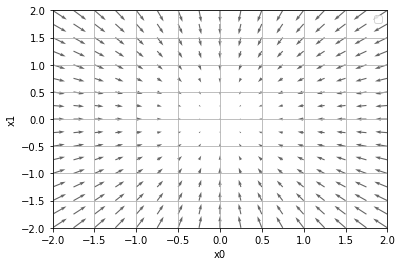

In [80]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 还原值
        
    return grad 
      
def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)
    
def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

4.4.1  梯度法

    梯度表示的是各点处的函数值减小最多的方向。
    实际上，在复杂的函数中，梯度指示的方向基本上都不是函数值最小处。
    虽然梯度的方向并不一定指向最小值，但沿着它的方向能够最大限度地减小函数的值。
    通过不断的沿着梯度方向前进，逐渐减小函数值的过程就是梯度法。

$ x_0 = x_0 - \eta \frac{\partial f }{\partial x_0} $

$ x_1 = x_1 - \eta \frac{\partial f }{\partial x_1} $

上式中的 $\eta $ 表示更新量，在神经网络的学习中，称为学习量(Learning rate)。学习率决定在一次学习中，应该学习多少，以及在多大程度上更新参数。

学习率需要事先确定未某个值。在神经网络的学习中，一般会一边改变学习率的值，一边确认学习是否正确进行。

In [82]:
# 求函数f的梯度
def numerical_gradient(f,x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # 生成和 x 形状相同、所有元素都为 0 的数组
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h)的计算
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h)的计算
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 还原值
        
    return grad

In [83]:
# 梯度下降法
def gradient_descent(f, init_x, lr=0.01, step_num = 100):
    x = init_x # init_x是初始值
    
    for i in range(step_num): # step_num
        grad = numerical_gradient(f, x) # 求梯度
        x -= lr * grad # ls是学习率learning rate
        
    return x

用梯度法求 $ f(x_0 + x_1)=x_0^2+x_1^2 $ 的最小值

In [84]:
def function_2(x):\
    return x[0]**2+x[1]**2

init_x = np.array([-3.1, 4.0])
gradient_descent(function_2, init_x=init_x,lr=0.1,step_num=100)

array([-6.31481153e-10,  8.14814391e-10])

用图来表示梯度法的更新过程

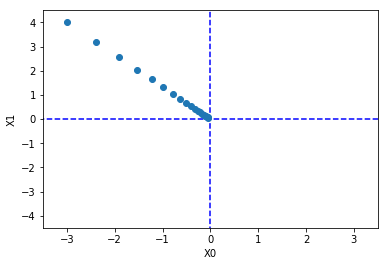

In [91]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
# from gradient_2d import numerical_gradient

# 求函数f的梯度
def numerical_gradient(f,x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # 生成和 x 形状相同、所有元素都为 0 的数组
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h)的计算
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h)的计算
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 还原值
        
    return grad

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [92]:
# 学习率过大的例子：lr=10.0
init_x = np.array([-3.0,4.0])
gradient_descent(function_2,init_x=init_x,lr=10.0,step_num=100)

(array([-2.58983747e+13, -1.29524862e+12]),
 array([[-3.00000000e+00,  4.00000000e+00],
        [ 5.70000000e+01, -7.60000000e+01],
        [-1.08300000e+03,  1.44400000e+03],
        [ 2.05770000e+04, -2.74360000e+04],
        [-3.90963008e+05,  5.21284002e+05],
        [ 7.42829664e+06, -9.90439654e+06],
        [-1.41137328e+08,  1.88183103e+08],
        [ 2.68126267e+09, -3.57501690e+09],
        [-5.09763373e+10,  6.79001831e+10],
        [ 9.45170863e+11, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.295

In [93]:
# 学习率过小的例子：lr=1e-10
init_x = np.array([-3.0,4.0])
gradient_descent(function_2,init_x=init_x,lr=1e-10,step_num=100)

(array([-2.99999994,  3.99999992]), array([[-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  3.99999999],
        [-3.        ,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999998,  3.99999998],
        [-2.99999998,  3.9999

设定合适都得学习率是一个很重要的问题。

像学习率这样的参数称为超参数。相对于神经网络的权重参数是通过训练数据和学习算法自动获得的，学习率这样的超参数则是人工设定的。

4.4.2  神经网络的梯度

    神经网络的学习也要求梯度，这里所说的梯度是指损失函数关于权重参数的梯度。

In [126]:
import sys,os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 用高斯分布进行初始化
        
    def predict(self, x):
        return np.dot(x, self.W) # 点积
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [127]:
net = simpleNet()
print(net.W) # 权重参数

[[-0.04296809  0.26313277  0.93494089]
 [ 0.69117613 -0.89949683 -0.10348876]]


In [128]:
x = np.array([0.6,0.9])
p = net.predict(x)
print(p)

[ 0.59627767 -0.65166748  0.46782465]


In [129]:
np.argmax(p) # 最大值的索引

0

In [130]:
t = np.array([0,0,1]) # 正确解标签
net.loss(x,t)

0.9015883539439637

In [132]:
def f(W):
    return net.loss(x,t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.27693805  0.07950729 -0.35644533]
 [ 0.41540707  0.11926093 -0.534668  ]]


In [133]:
f = lambda w: net.loss(x,t)
dW = numerical_gradient(f, net.W)

#### 4.5 学习算法的实现

    神经网络的学习步骤如下所示：

##### 前提

神经网络存在合适的权重和偏置，调整权重和偏置以便拟合训练数据的过程称为“学习”。神经网络的学习分成下面4个步骤。

##### 步骤 1 （mini-batch）

从训练数据中随机选出一部分数据，这部分数据称为 mini-batch 。我们的目标是减小 mini-batch 的损失函数的值。

##### 步骤 2 （计算梯度）

为了减小 mini-batch 的损失函数的值，需要求出各个权重参数的梯度。梯度表示损失函数的值减小最多的方向。

##### 步骤3 （更新参数）

将权重参数沿梯度方向进行微小更新

##### 步骤 4 （重复）

重复步骤1、步骤2、步骤3 

这个方法通过梯度下降法更新参数，不过因为这里使用的数据是随机选择的 mini-batch 数据，所以又称为 随机梯度下降法（stochastic gradient descent）

随机梯度下降法是“对随机选择的数据进行梯度下降法”。

深度学习的很多框架中，随机梯度下降法一般由一个名为 SGD 的函数来实现。

实现手写数字识别的神经网络，这里以 2 层神经网络(隐藏层为1层的网络)为对象，使用MNIST数据集进行学习。

4.5.1  2层神经网络的类

In [5]:
import sys,os
sys.path.append(os.pardir) # 为了导入父目录的文件而进行的设定
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
            # 初始化权重     输入层神经元，隐藏层神经元，输出层神经元，0.01
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size) # 高斯分布随机数
        self.params['b1'] = np.zeros(hidden_size) # 设置0
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) # 高斯分布随机数
        self.params['b2'] = np.zeros(output_size) # 设置0
        
    def predict(self, x):
        # 进行推理（识别）
        W1, W2 = self.params['W1'], self.params['W2'] # 权重
        b1, b2 = self.params['b1'], self.params['b2'] # 偏置
        
        a1 = np.dot(x, W1)+b1 # 点积+偏置
        z1 = sigmoid(a1) # sigmoid函数
        a2 = np.dot(z1, W2)+b2 # 点积+偏置
        y = softmax(a2) # softwax函数
        
        return y
    
    # x: 输入数据；t：监督数据
    def loss(self, x, t):
        # 计算损失函数的值
        y = self.predict(x) # 进行推理
        return cross_entropy_error(y, t) # 交叉熵代价函数 y：输出结果。t：监督数据
    
    def accuracy(self, x, t):
        # 计算识别精度
        y = self.predict(x) # 进行推理
        y = np.argmax(y, axis=1) # 最大值的索引
        t = np.argmax(t, axis=1) # 最大值的索引
        
        accuracy = np.sum(y == t) / float(x.shape[0]) # 计算识别率
        return accuracy
    
    # x：输入数据；t：监督数据
    def numerical_gradient(self, x, t):
        # 计算权重参数的梯度
        loss_W = lambda W: self.loss(x, t) # 匿名函数输入w输出net.loss(x, t)（计算损失函数的值）
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1']) # 计算权重参数的梯度
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    def gradient(self, x, t):
        # 计算权重参数的梯度，numerical_gradient()的高速版
        W1, W2 = self.params['W1'], self.params['W2'] # 权重
        b1, b2 = self.params['b1'], self.params['b2'] # 偏置
        grads = {} # 梯度
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1 # 点积+偏置
        z1 = sigmoid(a1) # sigmoid
        a2 = np.dot(z1, W2) + b2 # 点积+偏置
        y = softmax(a2) # softmax
        
        # backward
        dy = (y - t) / batch_num # y：输出结果。t：监督数据
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads


TwoLayerNet类中有params和grads两个字典型实例变量。params保存神经网络的参数的字典型变量（实例变量）。grads保存梯度的字典型变量（numerical_gradient()方法的返回值）

In [8]:
net = TwoLayerNet(input_size=784, hidden_size=100,output_size=10)
print('第一层的权重参数：' + str(net.params['W1'].shape))
print('第一层的偏置：' + str(net.params['b1'].shape))
print('第二层的权重参数：' + str(net.params['W2'].shape))
print('第二层的偏置：' + str(net.params['b2'].shape))

第一层的权重参数：(784, 100)
第一层的偏置：(100,)
第二层的权重参数：(100, 10)
第二层的偏置：(10,)


params变量中保存的权重参数会用在推理处理（前向处理）中，如下是推理处理的实现。

In [19]:
x = np.random.rand(100, 784) # 伪输入数据100笔
y = net.predict(x)
print(y.ndim) # 获得数组的维数
print(y.shape) # 获得数组的（行数，列数） 

2
(100, 10)


In [22]:
x = np.random.rand(100, 784) # 伪输入数据(100笔)
t = np.random.rand(100, 10) # 伪正确解标签(100笔)

grads = net.numerical_gradient(x, t) # 计算梯度

print('第一层权重的梯度：' + str(grads['W1'].shape))
print('第一层偏置的梯度：' + str(grads['b1'].shape))
print('第二层权重的梯度：' + str(grads['W2'].shape))
print('第二层偏置的梯度：' + str(grads['b2'].shape))
# grads['W1'].shape
# grads['b1'].shape
# grads['W2'].shape
# grads['b2'].shape

第一层权重的梯度：(784, 100)
第一层偏置的梯度：(100,)
第二层权重的梯度：(100, 10)
第二层偏置的梯度：(10,)


4.5.2  mini-batch 的实现

    mini-batch 学习，就是从训练数据中随机选择一部分数据（称为：mini-batch），再以这些mini-batch为对象，使用梯度法更新参数的过程。

In [14]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
# from two_layer_net import TwoLayerNet

(x_train, t_train),(x_test, t_test) = load_mnist(normalize = True, one_hot_label = True)

# 因机器性能原因，减少学习数据
x_train = x_train[:5000]
t_train = t_train[:5000]

train_loss_list = []

# 超参数
# iters_num = 10000 # 适当设定循环的次数(迭代次数)
iters_num = 10000
train_size = x_train.shape[0] # 训练数据：60000个
batch_size = 100 # 每次从60000个训练数据中随机取出100个数据(图像数据和正确解标签数据)
learning_rate = 0.1 # 学习率

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 获取 mini-batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 计算梯度
#   grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) # numrical_gradiet()的高速版
    
    # 更新参数
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 记录学习过程
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    

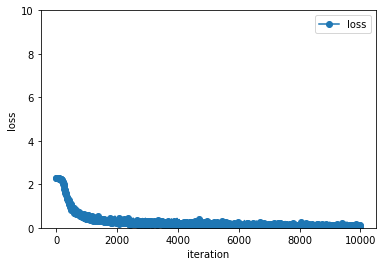

In [15]:
# 3.绘制图形==========
markers = {'loss': 'o'}
x = np.arange(iters_num)
plt.plot(x, train_loss_list, marker='o', label='loss', markevery=10)
# plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.ylim(0, 10)
plt.legend(loc='best')
plt.show()

train acc === 0.107 |  test acc === 0.0982
train acc === 0.2006 |  test acc === 0.1917
train acc === 0.1742 |  test acc === 0.1686
train acc === 0.1472 |  test acc === 0.1446
train acc === 0.2914 |  test acc === 0.2825
train acc === 0.4284 |  test acc === 0.4225
train acc === 0.5308 |  test acc === 0.5269
train acc === 0.586 |  test acc === 0.5786
train acc === 0.663 |  test acc === 0.6631
train acc === 0.6952 |  test acc === 0.6809
train acc === 0.7544 |  test acc === 0.7444
train acc === 0.7578 |  test acc === 0.7433
train acc === 0.7874 |  test acc === 0.7749
train acc === 0.8162 |  test acc === 0.8039
train acc === 0.8406 |  test acc === 0.8239
train acc === 0.8378 |  test acc === 0.8248
train acc === 0.8526 |  test acc === 0.8367
train acc === 0.8598 |  test acc === 0.8455
train acc === 0.868 |  test acc === 0.8516
train acc === 0.8712 |  test acc === 0.8565
train acc === 0.8756 |  test acc === 0.8588
train acc === 0.8816 |  test acc === 0.8661
train acc === 0.886 |  test acc === 

train acc === 0.9812 |  test acc === 0.9235
train acc === 0.9808 |  test acc === 0.9237
train acc === 0.981 |  test acc === 0.9234
train acc === 0.9804 |  test acc === 0.9244
train acc === 0.9814 |  test acc === 0.9227
train acc === 0.9816 |  test acc === 0.924
train acc === 0.9822 |  test acc === 0.9239
train acc === 0.9826 |  test acc === 0.9235
train acc === 0.9832 |  test acc === 0.924
train acc === 0.9832 |  test acc === 0.9235
train acc === 0.9822 |  test acc === 0.9236
train acc === 0.984 |  test acc === 0.925


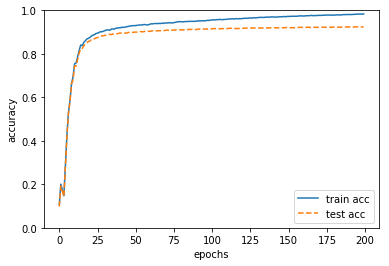

In [17]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
# from two_layer_net import TwoLayerNet

# 读入数据
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# 因机器性能原因，减少学习数据
x_train = x_train[:5000]
t_train = t_train[:5000]

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 适当设定循环的次数
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 计算梯度
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 更新参数
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc === " + str(train_acc) +" | "+ " test acc === " + str(test_acc))

# 绘制图形
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()